In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C://Users//somya//OneDrive//Desktop//car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
from datetime import date
curr_year = date.today().year
curr_year

2021

In [7]:
df['Age'] = curr_year - df['Year']
df['Age']

0       7
1       8
2       4
3      10
4       7
       ..
296     5
297     6
298    12
299     4
300     5
Name: Age, Length: 301, dtype: int64

In [8]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


<AxesSubplot:>

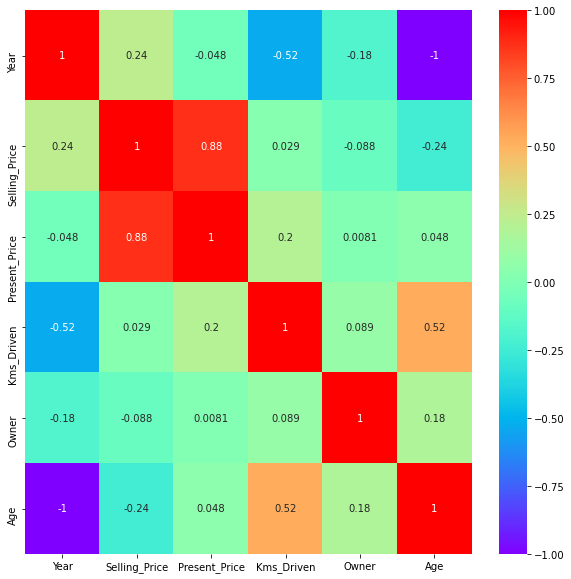

In [9]:
correlations=df.corr()
indx=correlations.index
plt.figure(figsize=(10,10))
sns.heatmap(df[indx].corr(),annot=True,cmap="rainbow")


In [10]:
df.Car_Name.value_counts().head(10)

city             26
corolla altis    16
verna            14
fortuner         11
brio             10
i20               9
ciaz              9
innova            9
grand i10         8
amaze             7
Name: Car_Name, dtype: int64

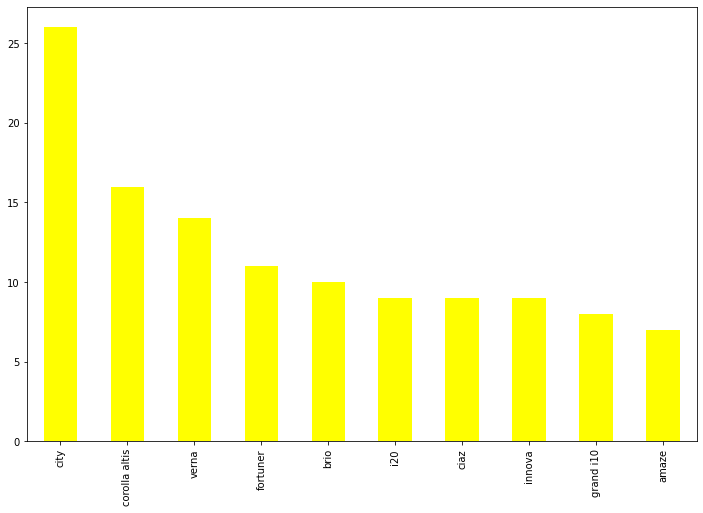

In [11]:
plt.figure(figsize = [12,8])
df.Car_Name.value_counts().head(10).plot(kind = 'bar', color= 'yellow')
plt.show()

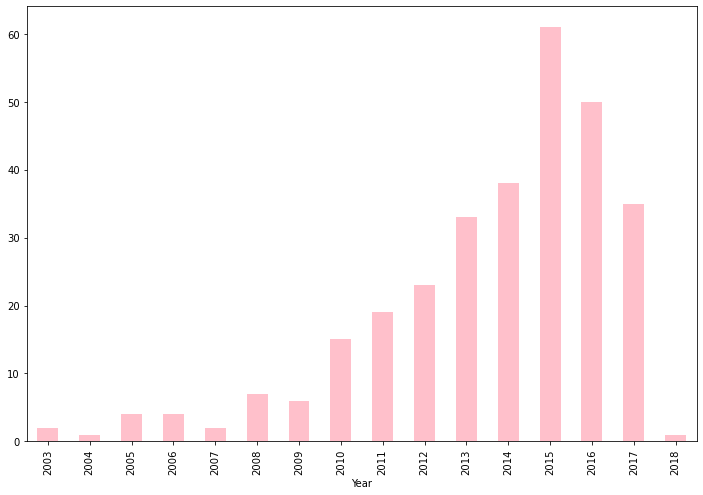

In [12]:
plt.figure(figsize = [12,8])
df.groupby('Year').count()['Car_Name'].plot(kind = 'bar', color='pink')
plt.show()

In [13]:
df.drop('Car_Name',axis=1,inplace=True)
df.drop('Year',axis=1,inplace=True)
df.drop('Fuel_Type',axis=1,inplace=True)
df.drop('Seller_Type',axis=1,inplace=True)
df.drop('Transmission',axis=1,inplace=True)
df.drop('Owner',axis=1,inplace=True)
df

,Selling_Price,Present_Price,Kms_Driven,Age
0,3.35,5.59,27000,7
1,4.75,9.54,43000,8
2,7.25,9.85,6900,4
3,2.85,4.15,5200,10
4,4.60,6.87,42450,7
...,...,...,...,...
296,9.50,11.60,33988,5
297,4.00,5.90,60000,6
298,3.35,11.00,87934,12
299,11.50,12.50,9000,4


In [14]:
X = df[['Present_Price','Kms_Driven','Age']]

In [15]:
Y = df['Selling_Price']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3) 

In [17]:
X_train

,Present_Price,Kms_Driven,Age
205,5.700,3493,5
21,5.710,2400,4
146,0.787,15000,7
198,0.570,35000,10
151,0.550,31000,5
...,...,...,...
22,8.010,50000,10
263,7.700,16002,5
16,10.790,41678,6
99,20.450,50024,11


In [18]:
X_test

,Present_Price,Kms_Driven,Age
212,13.60,22671,5
26,5.87,55138,8
81,7.85,40000,6
37,2.28,127000,18
129,0.84,5000,4
...,...,...,...
239,4.43,23709,9
171,0.55,6700,6
85,23.73,142000,15
231,9.40,15001,4


In [19]:
Y_train

205    5.25
21     4.90
146    0.55
198    0.15
151    0.50
       ... 
22     4.40
263    6.60
16     7.25
99     9.65
190    0.20
Name: Selling_Price, Length: 210, dtype: float64

In [20]:
Y_test

212    11.25
26      4.15
81      4.75
37      0.35
129     0.78
       ...  
239     2.00
171     0.40
85      2.50
231     9.25
19      2.65
Name: Selling_Price, Length: 91, dtype: float64

In [21]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

In [22]:
reg.coef_

array([ 5.26704680e-01,  1.90890184e-06, -5.34539984e-01])

In [23]:
reg.intercept_

4.387931238237696

In [24]:
reg.predict(X_test)

array([ 8.92169168,  3.30862087,  5.39167915, -3.79047127,  2.70174774,
        4.83321917,  2.83159314,  5.69900889, -2.1164286 ,  3.92938417,
        6.20043579,  1.15295602,  7.96577163,  0.12618809,  0.03997131,
        8.42084954,  6.48367894,  2.82495737,  9.99948604,  0.49978305,
        4.79729879, 10.68537141,  6.24888563,  2.66421906, -0.34716164,
        8.39121575,  6.02899686, -0.39978438,  3.09478947,  5.43422434,
        7.981077  ,  6.43633509, -0.91233322,  2.7568219 , -3.75949724,
        7.94754575,  6.7337865 ,  4.9787806 , 10.02048587,  1.50835567,
        2.55498462, -0.53237258,  3.38789307,  2.59171995,  1.21531153,
       15.65143666,  4.59681584, -2.60706384,  0.55667038,  3.23787622,
        9.05375759,  8.39159753,  2.53964857,  8.85075992,  1.70896579,
        5.21496811,  4.1914828 ,  2.06820387,  1.31556621,  4.23673904,
        5.95977152,  2.1320979 , -1.32026548, 12.69135636,  2.54295543,
        5.21845679, -2.25197293,  1.48464053,  8.89937471,  4.94

In [27]:
reg.predict([[4.43 ,23709 ,9]])

array([1.95563127])

In [28]:
5.26704680e-01*4.43 +  1.90890184e-06*23709 + -5.34539984e-01*9 + 4.387931238237696

1.9556312683622559